Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 32)            896       
                                                                 
 spatial_dropout1d_1 (Spati  (None, 20, 32)            0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 17547 (68.54 KB)
Trainable params: 17547 (68.54 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

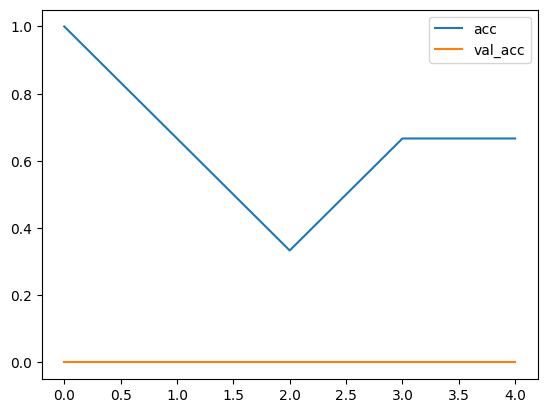

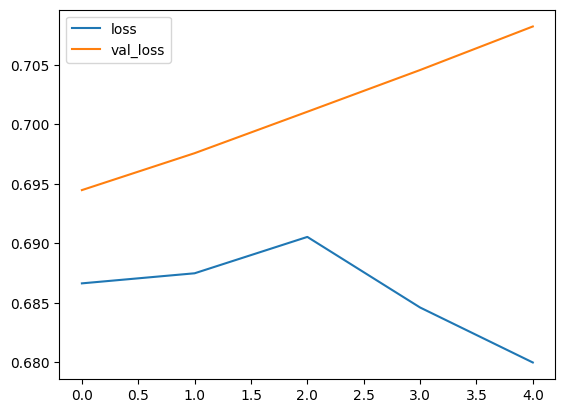

1/1 [==============================] - 0s 240ms/step
Predicted label:  positive
1/1 [==============================] - 0s 20ms/step
Predicted label:  positive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Embedding

# Create a dummy dataset
data = {
    'text': [
        "I loved the flight, it was amazing!",
        "The flight was okay, nothing special.",
        "Worst experience ever, flight delayed and rude staff.",
        "The flight attendants were friendly and helpful.",
        "Terrible service, I'll never fly with this airline again."
    ],
    'airline_sentiment': [
        'positive',
        'neutral',
        'negative',
        'positive',
        'negative'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Filter out neutral sentiment
review_df = df[df['airline_sentiment'] != 'neutral']

# Tokenize the text
tweet = review_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

# Determine vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Encode and pad sequences
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=20)

# Model architecture
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=20))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
print(model.summary())

# Model training
sentiment_label = review_df.airline_sentiment.factorize()
history = model.fit(padded_sequence, sentiment_label[0], validation_split=0.2, epochs=5, batch_size=32)

# Plot accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.savefig("Accuracy_plot.jpg")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig("Loss_plot.jpg")
plt.show()

# Prediction function
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen=20)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

# Test sentences
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)
